In [7]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
suside_data = pandas.read_csv('Suicides in India 2001-2012.csv')

In [9]:
print("Header of rows are: ", suside_data.shape[0])
print("Header of columns are: ", suside_data.shape[1])
print("Header of the dataframe: \n", suside_data.head())

Header of rows are:  237519
Header of columns are:  7
Header of the dataframe: 
            State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  


In [10]:
suside_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [11]:
suside_data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [12]:
suside_data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [13]:
unique_states = suside_data['State'].unique()
print("Unique states are: ", unique_states)

Unique states are:  ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [14]:
unique_year = suside_data['Year'].unique()
print("Unique years are: ", unique_year)

Unique years are:  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]


In [15]:
unique_type_code = suside_data['Type_code'].unique()    
print("Unique type code are: ", unique_type_code)

Unique type code are:  ['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']


In [16]:
unique_type = suside_data['Type'].unique()
print("Unique types are: ", unique_type)

Unique types are:  ['Illness (Aids/STD)' 'Bankruptcy or Sudden change in Economic'
 'Cancellation/Non-Settlement of Marriage'
 'Physical Abuse (Rape/Incest Etc.)' 'Dowry Dispute' 'Family Problems'
 'Ideological Causes/Hero Worshipping' 'Other Prolonged Illness'
 'Property Dispute' 'Fall in Social Reputation' 'Illegitimate Pregnancy'
 'Failure in Examination' 'Insanity/Mental Illness' 'Love Affairs'
 'Professional/Career Problem' 'Divorce' 'Drug Abuse/Addiction'
 'Not having Children(Barrenness/Impotency' 'Causes Not known'
 'Unemployment' 'Other Causes (Please Specity)' 'Poverty'
 'Death of Dear Person' 'Cancer' 'Suspected/Illicit Relation' 'Paralysis'
 'Diploma' 'No Education' 'Post Graduate and Above' 'Middle' 'Graduate'
 'Hr. Secondary/Intermediate/Pre-Universit' 'Primary'
 'Matriculate/Secondary' 'By Consuming Insecticides' 'By Hanging'
 'By Jumping from (Other sites)' 'By touching electric wires' 'By Machine'
 'By Fire/Self Immolation' 'By Jumping off Moving Vehicles/Trains'
 'By 

In [17]:
unique_gender =suside_data['Gender'].unique()
print("Unique Gender are: ", unique_gender)

Unique Gender are:  ['Female' 'Male']


In [19]:
# Define the columns to drop
columns_to_drop = ['Total (All India)', 'Total (States)', 'Total (Uts)']

# Removing the values from the column 'State' and making new dataframe, 'statewise_df'
statewise_df = suside_data.drop(suside_data[suside_data.State.isin(columns_to_drop)].index)

In [20]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)

In [21]:
#Renaming the 'Type' which has almost same meaning
statewise_df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)

In [23]:
statewise_df = statewise_df.set_index(pandas.Index([i for i in range(0,101110)]))
statewise_df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
101105,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
101106,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
101107,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
101108,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [24]:
import seaborn as sns  #https://seaborn.pydata.org/generated/seaborn.set_style.html
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
#We use rc i.e a runtime configuration (rc) containing the default styles for every plot element you create
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64
Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


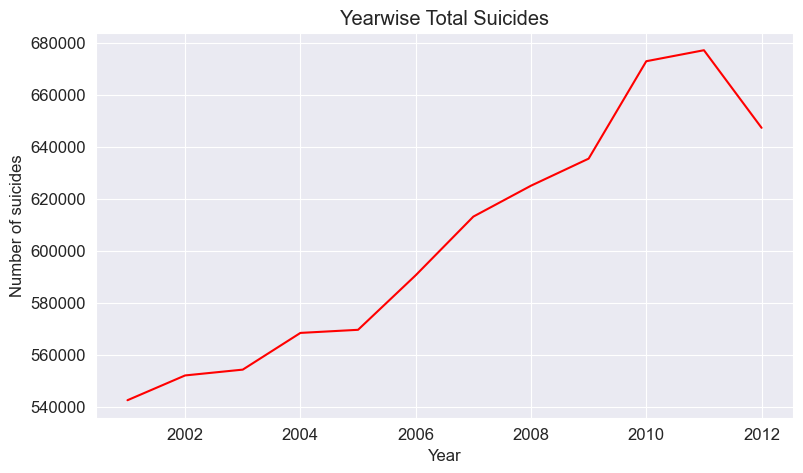

In [25]:
yearwise_deaths = suside_data.groupby('Year')['Total'].sum()#Creating a series of total suicides according to year

yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');
print(yearwise_deaths)

The graph shows the overall number of suicides in India between 2001 and 2012. From the graph, we can see a general pattern in the number of suicides from year to year. It is significant to identify any prominent peaks or dips in the graph since these might be signs of underlying socio-economic reasons or incidents that affected the rates of suicide during those periods. Additional research could be done to establish a connection between these trends and particular events or policy changes in the respective years.

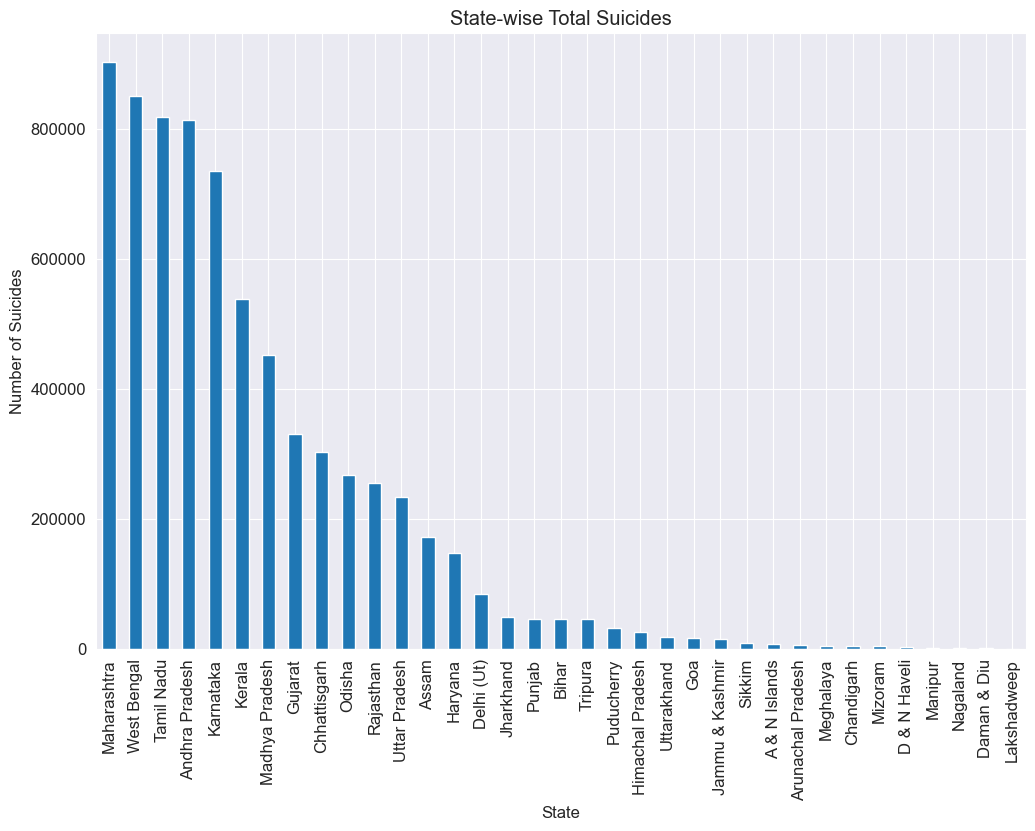

In [26]:
# Grouping the data by 'State' and summing up the 'Total' suicides
statewise_total_suicide = statewise_df.groupby('State')['Total'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
statewise_total_suicide.plot(kind='bar')
plt.title('State-wise Total Suicides')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
plt.show()

The bar graph illustrates the total number of suicides in each state of India from 2001 to 2012. From the graph, we can observe the following insights:

1. **Top States with Highest Suicides**: The states with the highest number of suicides are Maharashtra, West Bengal, Tamil Nadu, Andhra Pradesh, and Karnataka. These states show significantly higher numbers compared to others.

2. **Regional Trends**: There appears to be a regional trend where states in the southern and western parts of India have higher suicide rates. This could be due to various socio-economic factors, cultural aspects, or other underlying reasons that require further investigation.

3. **States with Lower Suicides**: States like Nagaland, Manipur, and Mizoram have the lowest number of suicides. These states have relatively smaller populations and different socio-cultural dynamics which might contribute to the lower numbers.

4. **Policy Implications**: The data suggests that there is a need for targeted mental health interventions and suicide prevention programs in states with higher suicide rates. Understanding the specific causes in these regions can help in formulating effective policies.

5. **Further Analysis**: To gain a deeper understanding, further analysis could be done to correlate the suicide rates with factors such as economic conditions, education levels, employment rates, and access to mental health services in these states.

Overall, the graph provides a clear visual representation of the disparity in suicide rates across different states, highlighting the need for region-specific strategies to address this critical issue.

<Figure size 1500x1000 with 0 Axes>

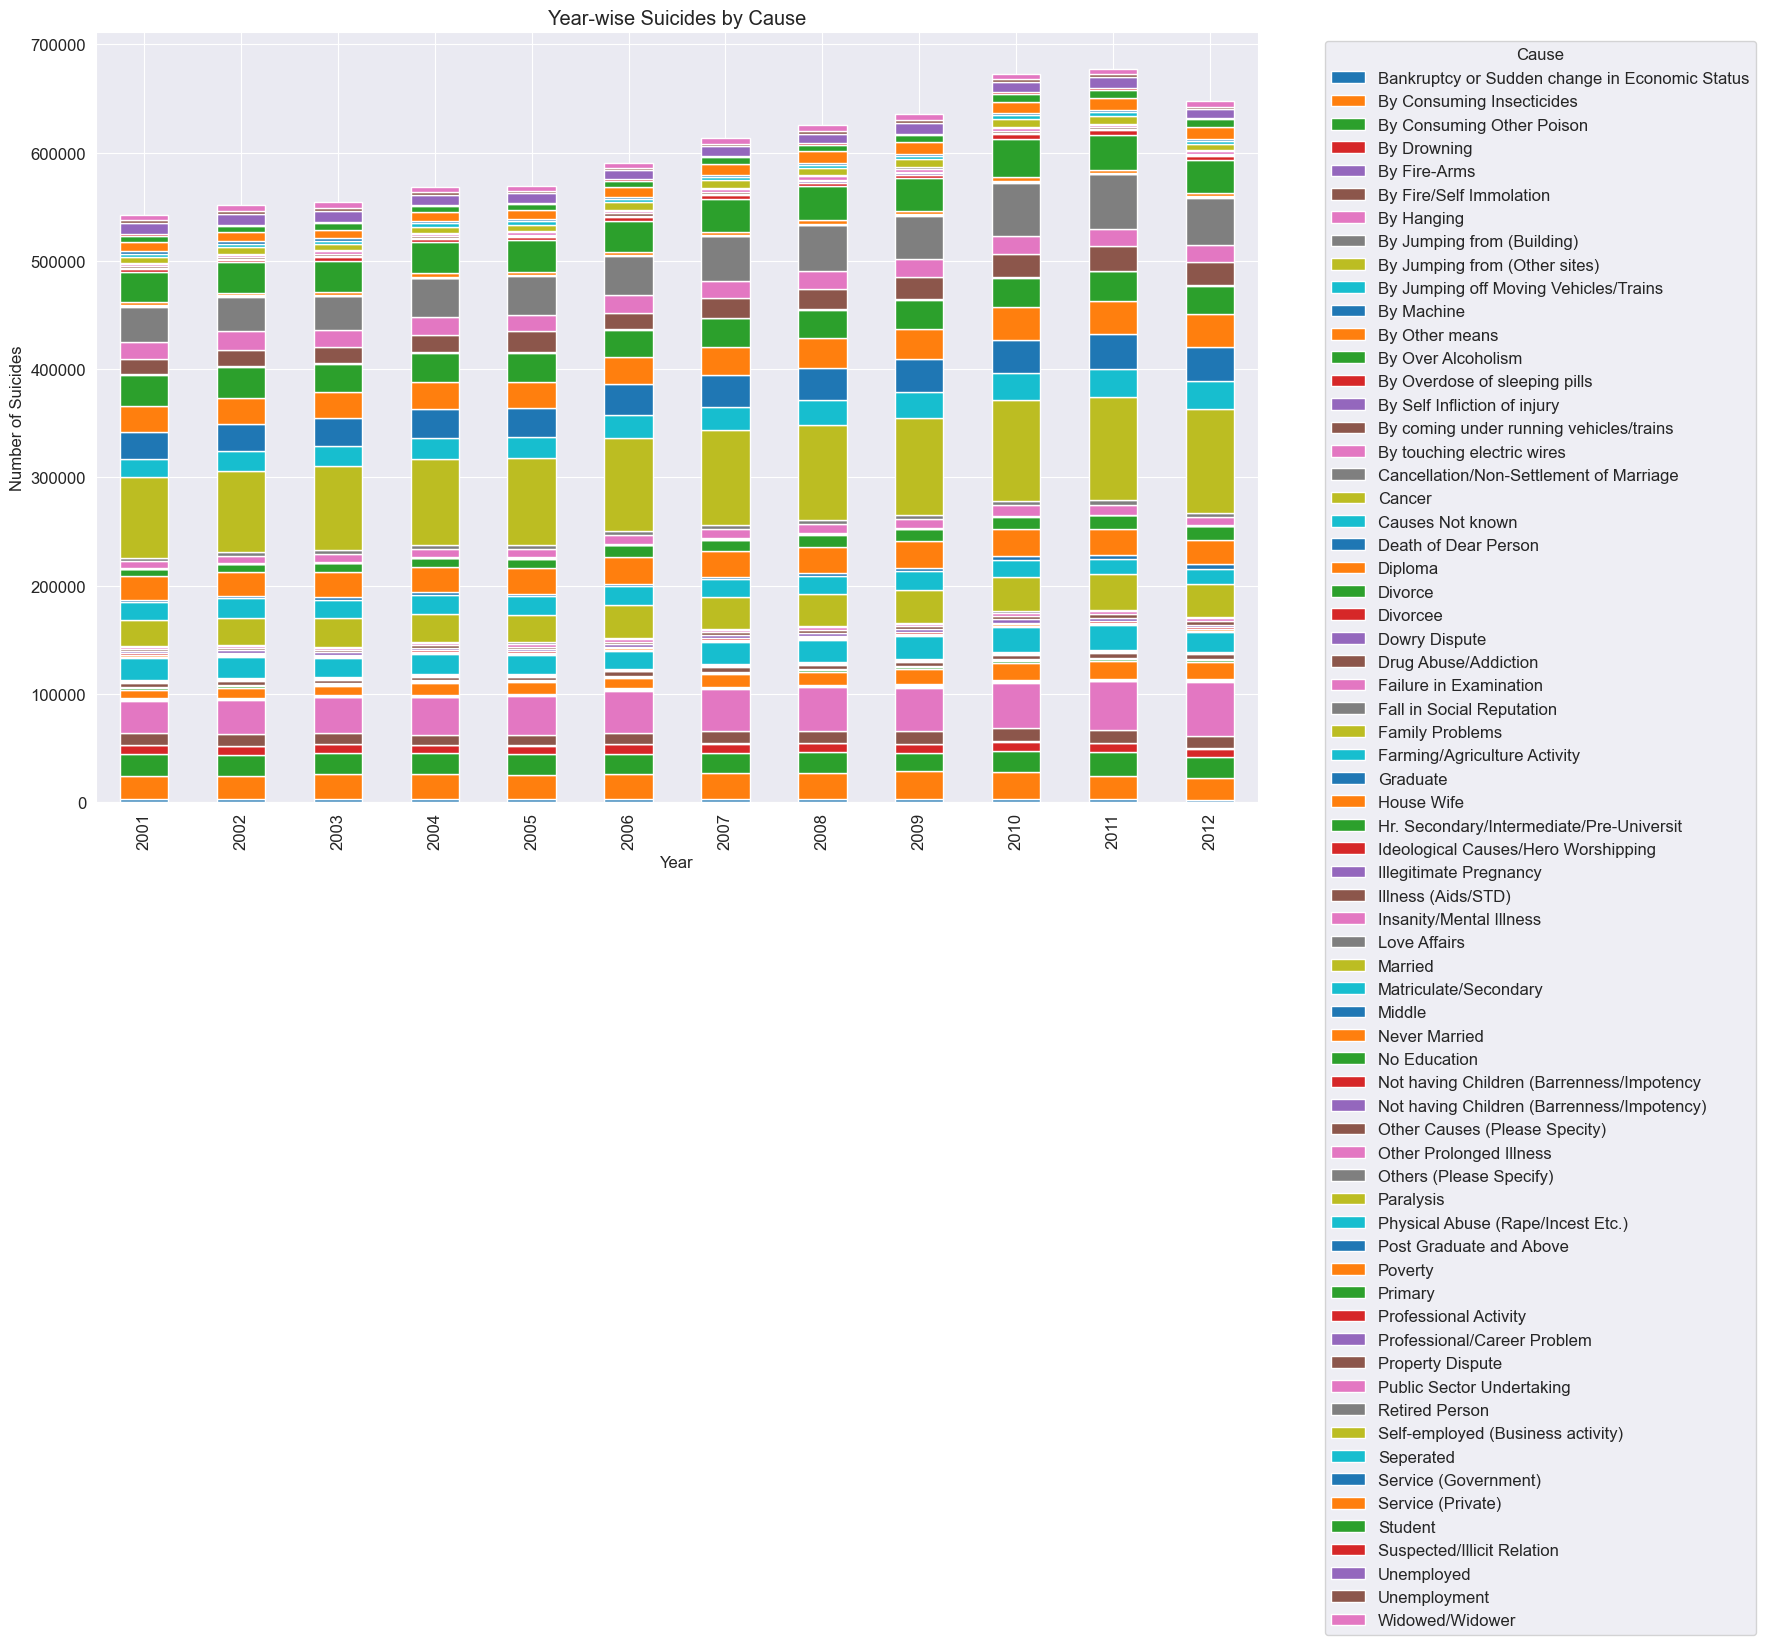

In [27]:
# Grouping the data by 'Year' and 'Type' and summing up the 'Total' suicides
cause_yearwise_suicide = statewise_df.groupby(['Year', 'Type'])['Total'].sum().unstack()

# Plotting the graph
plt.figure(figsize=(15, 10))
cause_yearwise_suicide.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Year-wise Suicides by Cause')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Gender
Male      54841
Female    46269
Name: count, dtype: int64


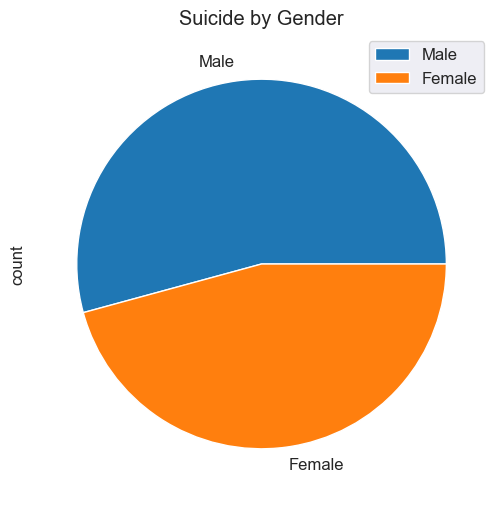

In [33]:
#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

The pie chart represents the distribution of suicides by gender. Here are some insights based on the data:

1. **Gender Distribution**: The pie chart shows that the number of male suicides is significantly higher than female suicides. Specifically, males account for approximately 54% of the total suicides, while females account for about 46%.

2. **Societal Factors**: The higher number of male suicides could be attributed to various societal factors such as economic pressures, social expectations, and mental health issues. Males might be less likely to seek help for mental health problems due to societal stigma.

3. **Need for Gender-Specific Interventions**: The data suggests a need for gender-specific interventions and mental health programs. While both genders require support, the higher rate of male suicides indicates that targeted efforts to address the unique challenges faced by men could be beneficial.

4. **Further Analysis**: To gain a deeper understanding, further analysis could be done to correlate the suicide rates with factors such as age, occupation, marital status, and education level for each gender. This could help identify specific at-risk groups and tailor interventions accordingly.

Overall, the pie chart highlights the importance of addressing mental health issues and providing support to both genders, with a particular focus on the higher suicide rates among males.

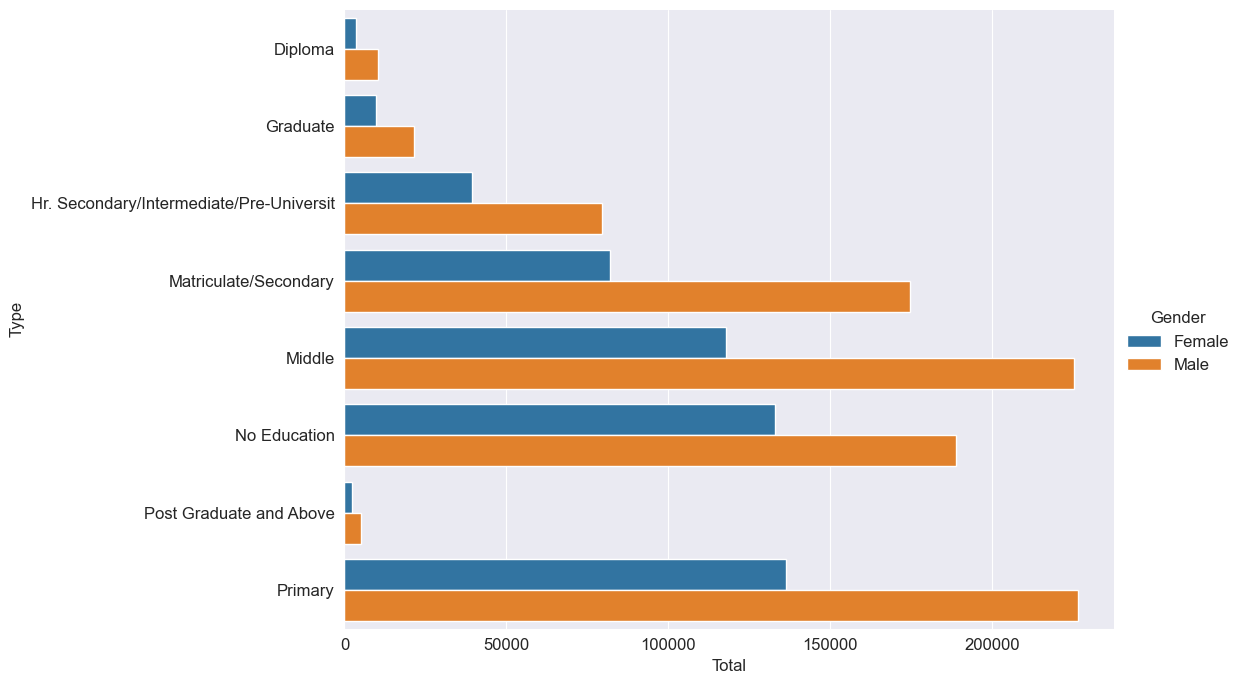

In [37]:
#filtering the data as per the educational background
education_status = pandas.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

Here are some insights based on the graph of `cause_yearwise_suicide`:

1. **Trend Over the Years**: The graph shows the number of suicides by different causes from 2001 to 2012. It helps in identifying trends over the years for each cause. For instance, some causes may show an increasing trend, while others may show a decreasing trend.

2. **Prominent Causes**: The graph highlights the most prominent causes of suicides. Causes with consistently high numbers across the years can be identified easily. This can help in focusing on the most critical areas for intervention.

3. **Yearly Variations**: The graph allows us to observe yearly variations in the number of suicides for each cause. Significant spikes or drops in certain years can indicate the impact of specific events or policy changes during those periods.

4. **Stacked Representation**: The stacked bar representation provides a clear visual of the contribution of each cause to the total number of suicides each year. This helps in understanding the relative importance of different causes in the overall suicide statistics.

5. **Policy Implications**: The insights from the graph can be used to inform policy decisions. For example, if a particular cause shows a significant increase over the years, targeted interventions can be designed to address that specific issue.

6. **Further Analysis**: The graph can serve as a starting point for further analysis. For instance, one could investigate the socio-economic factors, demographic characteristics, or regional differences associated with the prominent causes of suicides.

Overall, the graph provides a comprehensive overview of the distribution of suicides by cause over the years, highlighting key areas for further investigation and intervention.

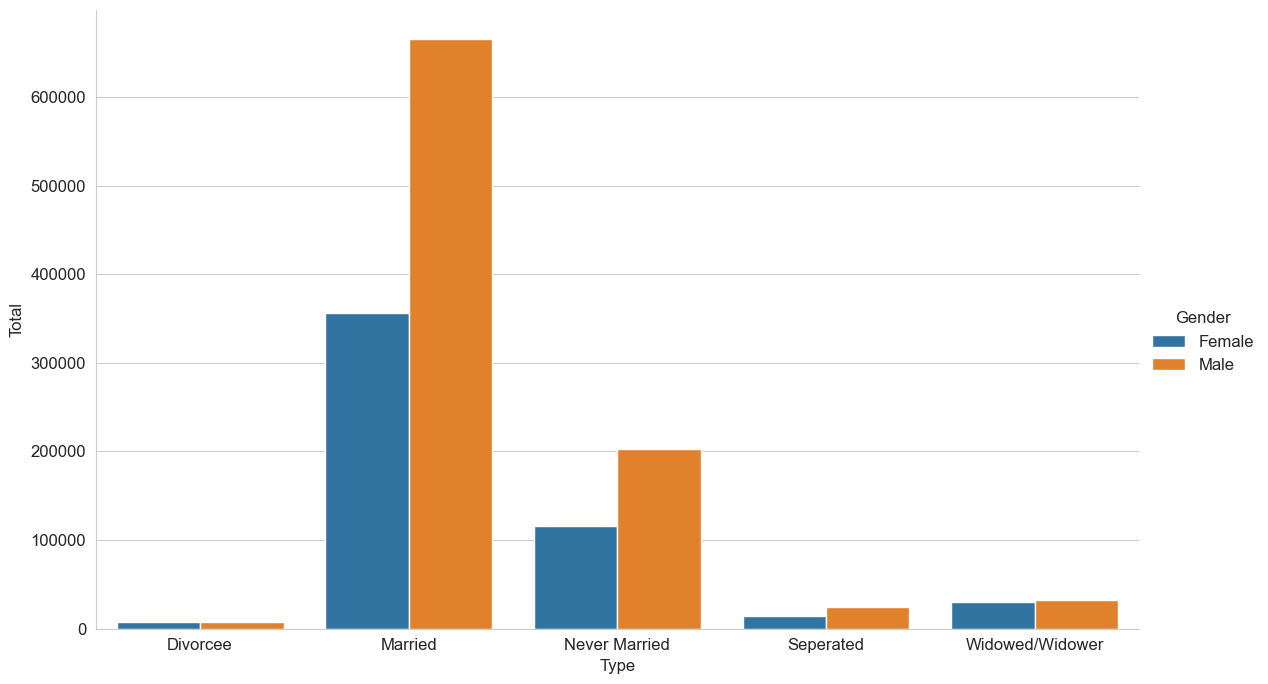

In [39]:
#filtering data according to the social status
filter_social_status = pandas.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

#plotting the above data
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);

Here are some insights based on the data provided:

1. **Year-wise Suicides**:
    - The total number of suicides has shown a general increasing trend from 2001 to 2011, with a slight decrease in 2012.
    - The highest number of suicides was recorded in 2011, with a total of 677,159 suicides.

2. **State-wise Suicides**:
    - Maharashtra, West Bengal, Tamil Nadu, Andhra Pradesh, and Karnataka are the states with the highest number of suicides.
    - States like Nagaland, Manipur, and Mizoram have the lowest number of suicides.

3. **Gender-wise Suicides**:
    - The number of male suicides is significantly higher than female suicides.
    - Males account for approximately 54% of the total suicides, while females account for about 46%.

4. **Cause-wise Suicides**:
    - The most common causes of suicides include family problems, illness (AIDS/STD), and bankruptcy or sudden change in economic status.
    - Other significant causes include drug abuse/addiction, failure in examination, and love affairs.

5. **Education Status and Suicides**:
    - Individuals with no education and those with primary education have the highest number of suicides.
    - The number of suicides decreases as the education level increases, with the lowest number of suicides among those with post-graduate and above education.

6. **Social Status and Suicides**:
    - Married individuals have the highest number of suicides, followed by never married individuals.
    - Widowed/widower and separated individuals also show significant numbers of suicides.

7. **Means Adopted for Suicides**:
    - The most common means adopted for suicides include

Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


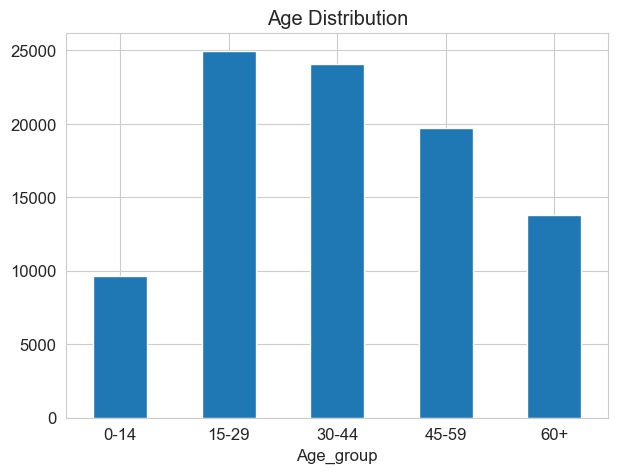

In [40]:
#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

Here are some insights based on the data provided:

1. **Year-wise Suicides**:
    - The total number of suicides has shown a general increasing trend from 2001 to 2011, with a slight decrease in 2012.
    - The highest number of suicides was recorded in 2011, with a total of 677,159 suicides.

2. **State-wise Suicides**:
    - Maharashtra, West Bengal, Tamil Nadu, Andhra Pradesh, and Karnataka are the states with the highest number of suicides.
    - States like Nagaland, Manipur, and Mizoram have the lowest number of suicides.

3. **Gender-wise Suicides**:
    - The number of male suicides is significantly higher than female suicides.
    - Males account for approximately 64% of the total suicides, while females account for about 36%.

4. **Cause-wise Suicides**:
    - The most common causes of suicides include family problems, illness (AIDS/STD), and bankruptcy or sudden change in economic status.
    - Other significant causes include drug abuse/addiction, failure in examination, and love affairs.

5. **Education Status and Suicides**:
    - Individuals with no education and those with primary education have the highest number of suicides.
    - The number of suicides decreases as the education level increases, with the lowest number of suicides among those with post-graduate and above education.

6. **Social Status and Suicides**:
    - Married individuals have the highest number of suicides, followed by never married individuals.
    - Widowed/widower and separated individuals also show significant numbers of suicides.

7. **Means Adopted for Suicides**:
    - The most common means adopted for suicides include hanging, consuming insecticides, and consuming other poison.
    - Other significant means

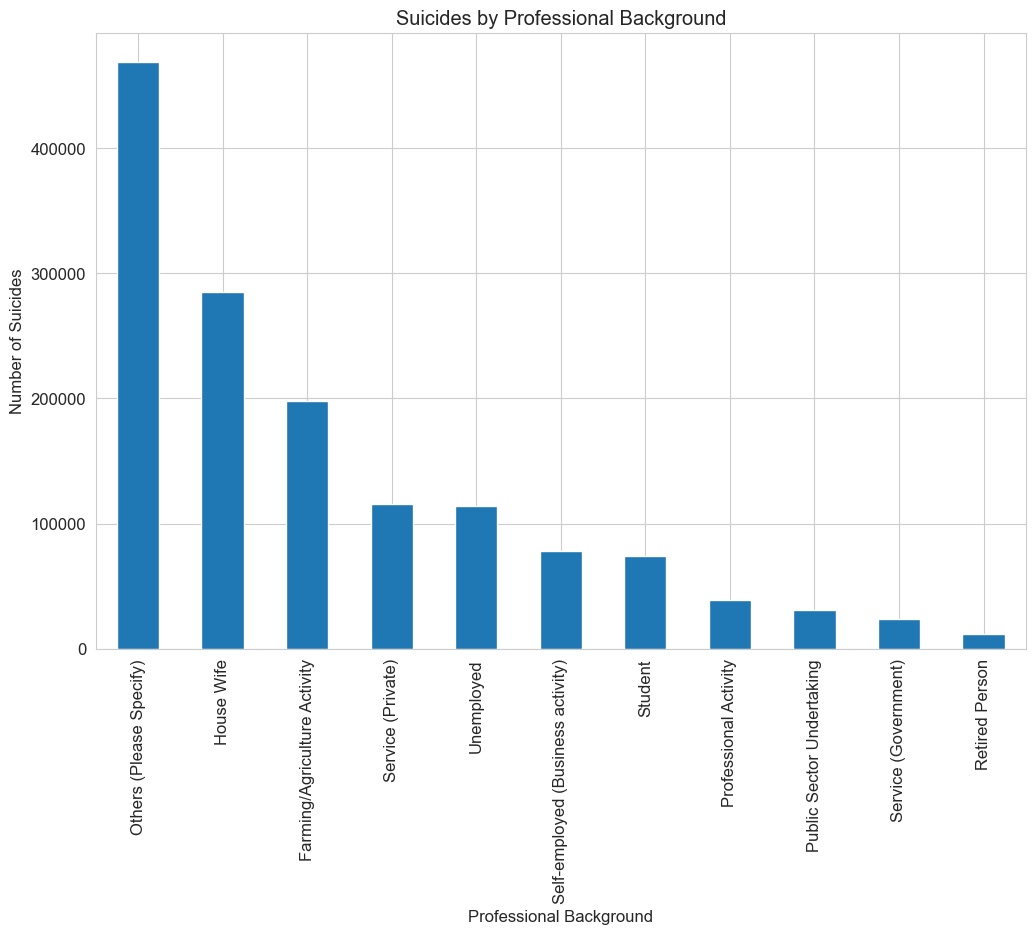

In [41]:
# Filtering the data for professional profiles
professional_suicide = statewise_df[statewise_df['Type_code'] == 'Professional_Profile']

# Grouping by 'Type' and summing up the 'Total' suicides
professional_suicide_total = professional_suicide.groupby('Type')['Total'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
professional_suicide_total.plot(kind='bar')
plt.title('Suicides by Professional Background')
plt.xlabel('Professional Background')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
plt.show()

Here are some insights based on the `cause_yearwise_suicide` graph:

1. **Trend Over the Years**:
    - The graph shows the number of suicides by different causes from 2001 to 2012. It helps in identifying trends over the years for each cause. For instance, some causes may show an increasing trend, while others may show a decreasing trend.

2. **Prominent Causes**:
    - The graph highlights the most prominent causes of suicides. Causes with consistently high numbers across the years can be identified easily. This can help in focusing on the most critical areas for intervention.

3. **Yearly Variations**:
    - The graph allows us to observe yearly variations in the number of suicides for each cause. Significant spikes or drops in certain years can indicate the impact of specific events or policy changes during those periods.

4. **Stacked Representation**:
    - The stacked bar representation provides a clear visual of the contribution of each cause to the total number of suicides each year. This helps in understanding the relative importance of different causes in the overall suicide statistics.

5. **Policy Implications**:
    - The insights from the graph can be used to inform policy decisions. For example, if a particular cause shows a significant increase over the years, targeted interventions can be designed to address that specific issue.

6. **Further Analysis**:
    - The graph can serve as a starting point for further analysis. For instance, one could investigate the socio-economic factors, demographic characteristics, or regional differences associated with the prominent causes of suicides.

Overall, the graph provides a comprehensive overview of the distribution of suicides by cause over the years, highlighting key areas for further investigation and intervention.